# Accident Severity 

### Table 

<h2> 1. Introduction </h2>

<h2> 2. Data preparation </h2>

<h2> 3. Training/Predicting Pipeline </h2>

<h2> 4. Prediction  </h2>

# Introduction 

The UK government collects and publishes (usually on an annual basis) detailed information about traffic accidents across the country. This information includes, but is not limited to, geographical locations, weather conditions, type of vehicles, number of casualties and vehicle manoeuvres, making this a very interesting and comprehensive dataset for analysis and research.

The data come from the Open Data website of the UK government, where they have been published by the Department of Transport.

The dataset comprises of two csv files:

Accident_Information.csv: every line in the file represents a unique traffic accident (identified by the Accident_Index column), featuring various properties related to the accident as columns. Date range: 2005-2017
Vehicle_Information.csv: every line in the file represents the involvement of a unique vehicle in a unique traffic accident, featuring various vehicle and passenger properties as columns. Date range: 2004-2016
Our target is to predict the accident severity. The severity is devided to two catagories; severe and slight.


In [70]:
import warnings
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import MinMaxScaler, FunctionTransformer, OneHotEncoder, KBinsDiscretizer, MaxAbsScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
import seaborn as sns
sns.set()
warnings.filterwarnings('ignore')
%matplotlib inline

# 2. Data Preparation

In [71]:
acc = pd.read_csv(r'C:\Users\Admin\Desktop\IBM_DS\Accident_Information.csv')
veh = pd.read_csv(r'C:\Users\Admin\Desktop\IBM_DS\Vehicle_Information.csv')

df = pd.merge(veh, acc, how = 'inner', on = 'Accident_Index')

df.shape
df.head()

,Accident_Index,Age_Band_of_Driver,Age_of_Vehicle,Driver_Home_Area_Type,Driver_IMD_Decile,Engine_Capacity_.CC.,Hit_Object_in_Carriageway,Hit_Object_off_Carriageway,Journey_Purpose_of_Driver,Junction_Location,...,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year_y,InScotland
0,201091NM02142,26 - 35,13.0,Small town,NaN,1389.0,Other object,Road sign or traffic signal,Other/Not known (2005-10),Approaching junction or waiting/parked at junc...,...,Northern,Wet or damp,Dual carriageway,None,60,15:45,Rural,Snowing no high winds,2010,Yes
1,201091NM01964,36 - 45,11.0,Data missing or out of range,NaN,955.0,None,None,Other/Not known (2005-10),Cleared junction or waiting/parked at junction...,...,Northern,Wet or damp,Single carriageway,None,60,18:25,Rural,Fine no high winds,2010,Yes
2,201091NM01964,46 - 55,NaN,Rural,NaN,NaN,None,None,Other/Not known (2005-10),Cleared junction or waiting/parked at junction...,...,Northern,Wet or damp,Single carriageway,None,60,18:25,Rural,Fine no high winds,2010,Yes
3,201091NM01935,26 - 35,2.0,Urban area,NaN,1997.0,None,None,Journey as part of work,Approaching junction or waiting/parked at junc...,...,Northern,Frost or ice,Single carriageway,None,30,9:38,Rural,Fine no high winds,2010,Yes
4,201091NM01935,46 - 55,NaN,Rural,NaN,NaN,None,None,Journey as part of work,Approaching junction or waiting/parked at junc...,...,Northern,Frost or ice,Single carriageway,None,30,9:38,Rural,Fine no high winds,2010,Yes


In [72]:
df.describe(include="all")

,Accident_Index,Age_Band_of_Driver,Age_of_Vehicle,Driver_Home_Area_Type,Driver_IMD_Decile,Engine_Capacity_.CC.,Hit_Object_in_Carriageway,Hit_Object_off_Carriageway,Journey_Purpose_of_Driver,Junction_Location,...,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year_y,InScotland
count,2010,2010,1805.000000,2010,198.000000,1844.000000,2010,2010,2010,2010,...,2010,2010,2010,2010,2010.000000,2010,2010,2010,2010.0,2010
unique,1396,9,NaN,4,NaN,NaN,10,10,5,9,...,2,5,6,6,NaN,647,2,9,NaN,2
top,201063DP20810,36 - 45,NaN,Rural,NaN,NaN,None,None,Other/Not known (2005-10),Not at or within 20 metres of junction,...,Dyfed-Powys,Dry,Single carriageway,None,NaN,11:30,Rural,Fine no high winds,NaN,No
freq,5,406,NaN,964,NaN,NaN,1912,1593,1375,1079,...,1694,1181,1703,1917,NaN,22,1778,1420,NaN,1694
mean,NaN,NaN,7.561773,NaN,6.176768,1978.297180,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,49.014925,NaN,NaN,NaN,2010.0,NaN
std,NaN,NaN,4.650678,NaN,2.666595,1853.042052,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,14.241212,NaN,NaN,NaN,0.0,NaN
min,NaN,NaN,1.000000,NaN,1.000000,49.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,20.000000,NaN,NaN,NaN,2010.0,NaN
25%,NaN,NaN,4.000000,NaN,4.000000,1299.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,30.000000,NaN,NaN,NaN,2010.0,NaN
50%,NaN,NaN,7.000000,NaN,6.000000,1598.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,60.000000,NaN,NaN,NaN,2010.0,NaN
75%,NaN,NaN,10.000000,NaN,9.000000,1997.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,60.000000,NaN,NaN,NaN,2010.0,NaN


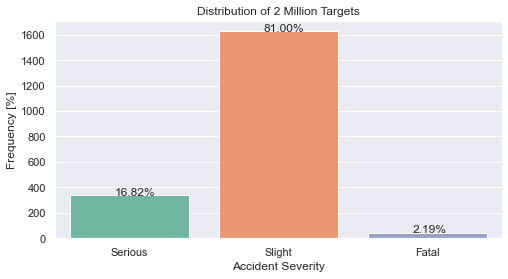

In [73]:
ax = sns.countplot(x = df.Accident_Severity ,palette="Set2")
sns.set(font_scale=1)
ax.set_xlabel(' ')
ax.set_ylabel(' ')
fig = plt.gcf()
fig.set_size_inches(8,4)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100*p.get_height()/len(df.Accident_Severity)), (p.get_x()+ 0.3, p.get_height()))

plt.title('Distribution of 2 Million Targets',)
plt.xlabel('Accident Severity')
plt.ylabel('Frequency [%]')
plt.show()

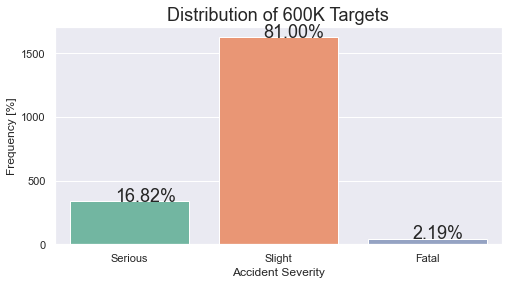

In [74]:
ax = sns.countplot(x = df.Accident_Severity ,palette="Set2")
sns.set(font_scale=1.5)
ax.set_xlabel(' ')
ax.set_ylabel(' ')
fig = plt.gcf()
fig.set_size_inches(8,4)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100*p.get_height()/len(df.Accident_Severity)), (p.get_x()+ 0.3, p.get_height()))

plt.title('Distribution of 600K Targets',)
plt.xlabel('Accident Severity')
plt.ylabel('Frequency [%]')
plt.show()

In [75]:
null_count = df.isnull().sum()
null_count[null_count>0]

Age_of_Vehicle                205
Driver_IMD_Decile            1812
Engine_Capacity_.CC.          166
model                         211
Propulsion_Code               125
2nd_Road_Class               1079
LSOA_of_Accident_Location     316
dtype: int64

Min: 1.0 
Max: 48.0 
Median: 7.0


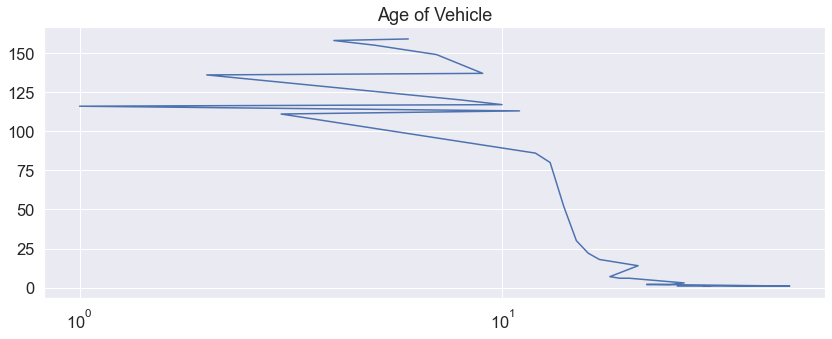

In [76]:
(df.Age_of_Vehicle
 .value_counts()
 .plot(title = "Age of Vehicle", 
       logx = True, 
       figsize=(14,5)))

print('Min:',    df.Age_of_Vehicle.min(), '\n'
      'Max:',    df.Age_of_Vehicle.max(), '\n'
      'Median:', df.Age_of_Vehicle.median())

Min: 49.0 
Max: 16120.0 
Median: 1598.0


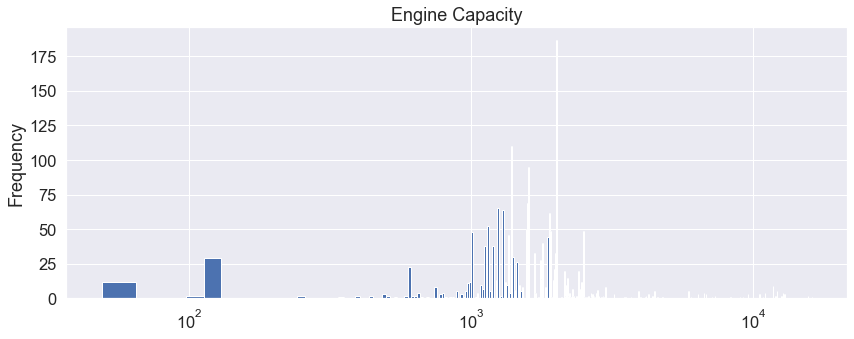

In [77]:
(df['Engine_Capacity_.CC.']
 .plot(kind='hist',
       bins = 1000,
       title = "Engine Capacity", 
       figsize=(14,5),
       logx = True
      ))

print('Min:',    df['Engine_Capacity_.CC.'].min(), '\n'
      'Max:',    df['Engine_Capacity_.CC.'].max(), '\n'
      'Median:', df['Engine_Capacity_.CC.'].median())

In [78]:
df2 = df[['Accident_Index', '1st_Road_Class','Day_of_Week', 'Junction_Detail','Light_Conditions', 'Number_of_Casualties',
          'Number_of_Vehicles', 'Road_Surface_Conditions', 'Road_Type', 'Special_Conditions_at_Site', 'Speed_limit',
          'Time', 'Urban_or_Rural_Area', 'Weather_Conditions', 'Age_Band_of_Driver', 'Age_of_Vehicle',
          'Hit_Object_in_Carriageway', 'Hit_Object_off_Carriageway', 'make', 'Engine_Capacity_.CC.', 'Sex_of_Driver',
          'Skidding_and_Overturning', 'Vehicle_Manoeuvre', 'Vehicle_Type', 'Accident_Severity'
         ]]

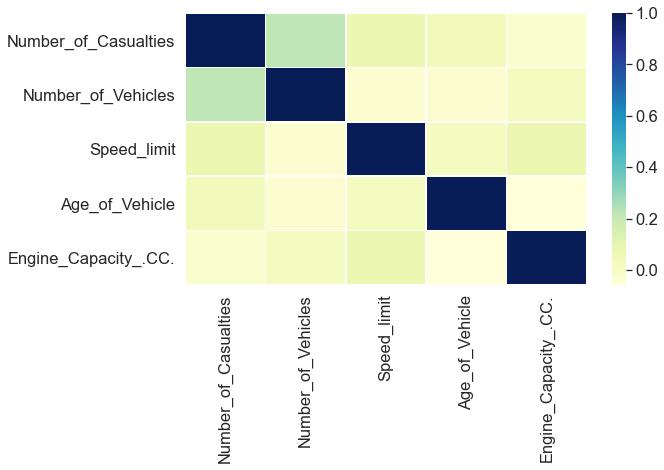

In [79]:
plt.figure(figsize=(9,5))
sns.heatmap(df2.corr(),linewidths=.5,cmap="YlGnBu")
plt.show()

Min: 1 
Max: 7 
Median: 2.0


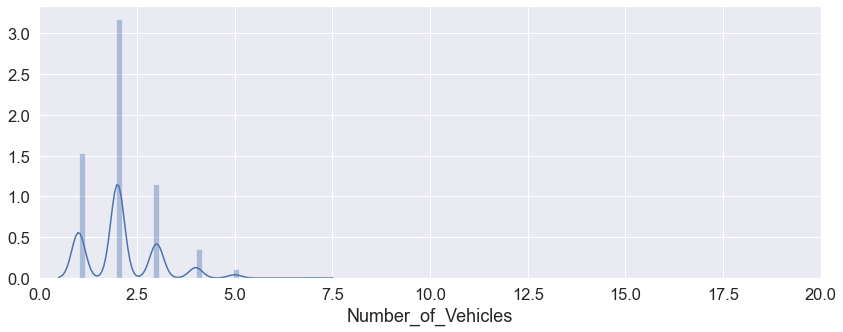

In [80]:
plt.figure(figsize=(14,5))
sns.distplot(df2.Number_of_Vehicles).set_xlim(0,20)
print('Min:',    df2.Number_of_Vehicles.min(), '\n'
      'Max:',    df2.Number_of_Vehicles.max(), '\n'
      'Median:', df2.Number_of_Vehicles.median())

Min: 1 
Max: 43 
Median: 1.0


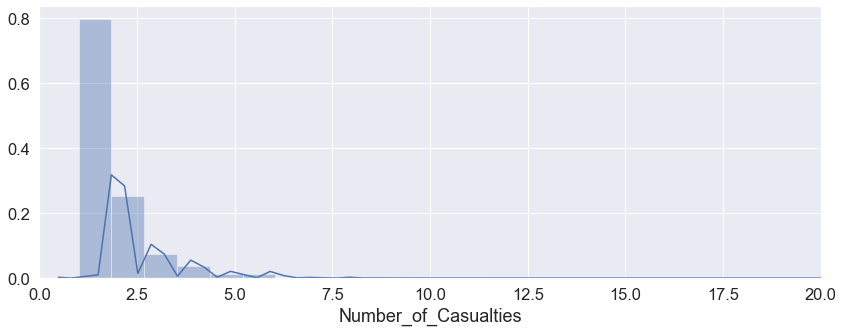

In [81]:
plt.figure(figsize=(14,5))
sns.distplot(df2.Number_of_Casualties).set_xlim(0,20)
print('Min:',    df2.Number_of_Casualties.min(), '\n'
      'Max:',    df2.Number_of_Casualties.max(), '\n'
      'Median:', df2.Number_of_Casualties.median())

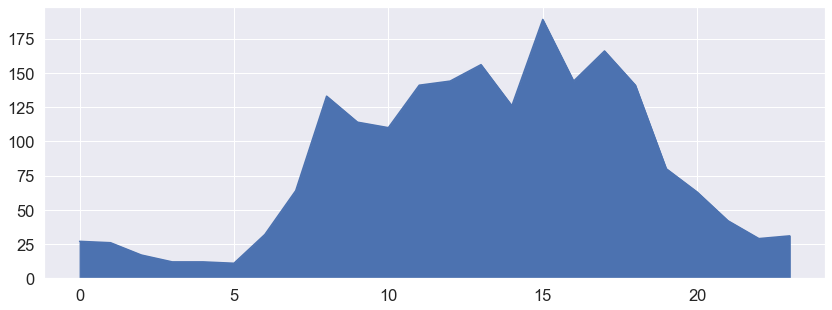

In [82]:
time_x = pd.to_datetime(df2['Time'], format='%H:%M').dt.hour
plt.figure(figsize=(14,5))
time_x.value_counts().sort_index().plot(kind='area')

In [83]:
df2['Accident_Severity'] = df2['Accident_Severity'].replace(['Serious', 'Fatal'], 'Serious or Fatal')
df2 = pd.get_dummies(df2, columns=['Accident_Severity'])
df2 = df2.drop('Accident_Severity_Serious or Fatal', axis=1)
df2.Accident_Severity_Slight.value_counts(normalize=True)

1    0.80995
0    0.19005
Name: Accident_Severity_Slight, dtype: float64

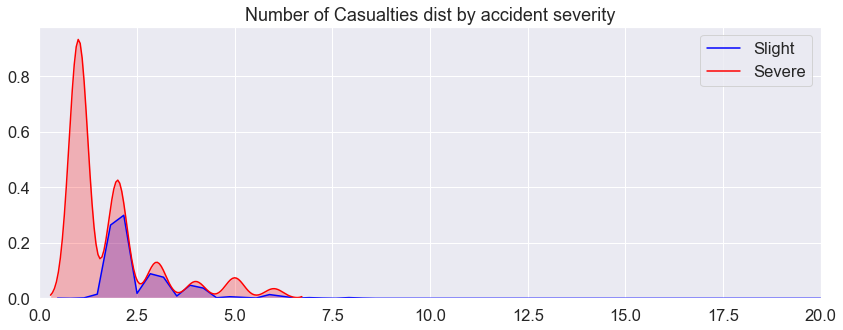

In [84]:
plt.figure(figsize=(14,5))
acc_slight = df2.Accident_Severity_Slight == 1
acc_severe = df2.Accident_Severity_Slight == 0

sns.kdeplot(df2.Number_of_Casualties[acc_slight],shade=True,color='Blue', label='Slight').set_xlim(0,20)
sns.kdeplot(df2.Number_of_Casualties[acc_severe],shade=True,color='Red', label='Severe').set_xlim(0,20)

plt.title('Number of Casualties dist by accident severity')
plt.show()

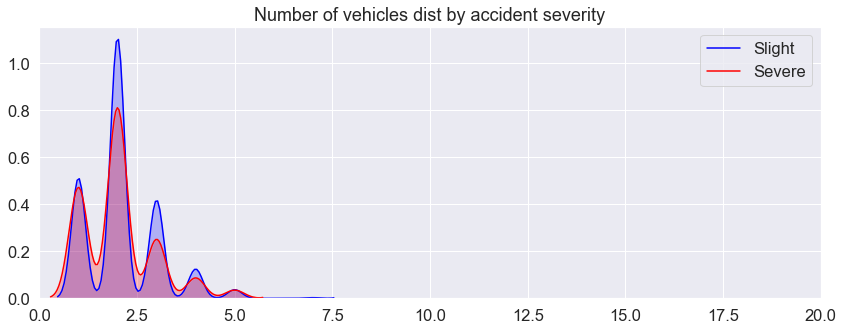

In [85]:
plt.figure(figsize=(14,5))

sns.kdeplot(df2.Number_of_Vehicles[acc_slight],shade=True,color='Blue', label='Slight').set_xlim(0,20)
sns.kdeplot(df2.Number_of_Vehicles[acc_severe],shade=True,color='Red', label='Severe').set_xlim(0,20)

plt.title('Number of vehicles dist by accident severity')
plt.show()

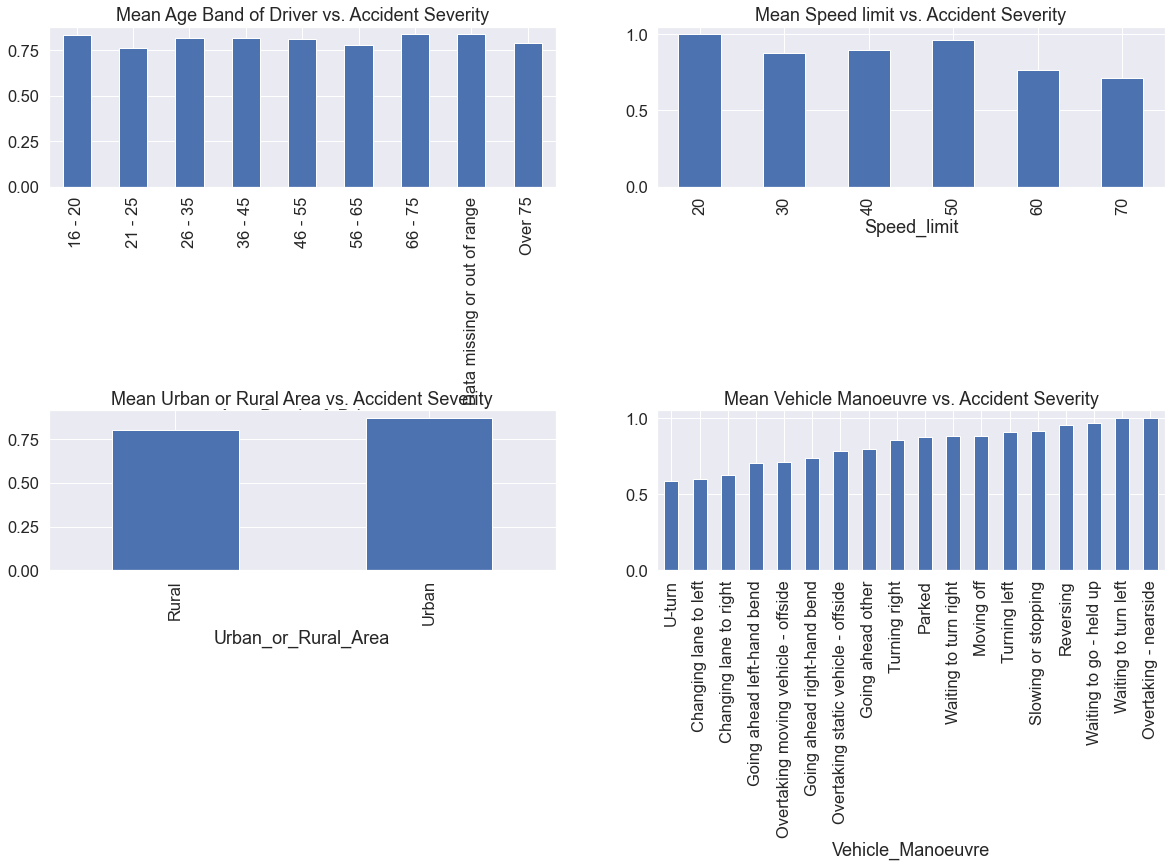

In [86]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,10))
plt.subplots_adjust(hspace=1.4)

(df2.groupby(['Age_Band_of_Driver'])
 .mean()
 ['Accident_Severity_Slight']
 .sort_index()
 .plot
 .bar(title = "Mean Age Band of Driver vs. Accident Severity",
      ax = axes[0,0]))

(df2.groupby(['Speed_limit'])
 .mean()
 ['Accident_Severity_Slight']
 .sort_index()
 .plot
 .bar(title = "Mean Speed limit vs. Accident Severity",
      ax = axes[0,1]))

(df2.groupby(['Urban_or_Rural_Area'])
 .mean()
 ['Accident_Severity_Slight']
 .sort_index()
 .plot
 .bar(title = "Mean Urban or Rural Area vs. Accident Severity",
      ax = axes[1,0]))

(df2.groupby(['Vehicle_Manoeuvre'])
 .mean()
 ['Accident_Severity_Slight']
 .sort_values()
 .plot
 .bar(title = "Mean Vehicle Manoeuvre vs. Accident Severity",
      ax = axes[1,1]))

plt.show()

In [87]:
X = df2.drop(['Accident_Index','Accident_Severity_Slight'], axis=1)
y = df2.Accident_Severity_Slight
print(X.shape,
      y.shape)

(2010, 23) (2010,)


In [88]:
def get_Speed_limit(df):
    return df[['Speed_limit']]

FullTransformerOnSpeedLimit = Pipeline([("Select_Speed_Limit", FunctionTransformer(func=get_Speed_limit, validate=False)),
                                        ("Fill_Null",          SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
                                        ("One_Hot_Encoder",    OneHotEncoder(sparse = False, handle_unknown='ignore'))
                                       ])

In [89]:
def get_Time(df):
    return pd.to_datetime(df['Time'], format='%H:%M').dt.time

def find_time_group(time_object):
    if time_object<pd.datetime.time(pd.datetime(2000,1,1,5,0)):
        return 'Night'
    elif time_object<pd.datetime.time(pd.datetime(2000,1,1,7,0)):
        return 'Early Morning'
    elif time_object<pd.datetime.time(pd.datetime(2000,1,1,10,0)):
        return 'Morning'
    elif time_object<pd.datetime.time(pd.datetime(2000,1,1,15,0)):
        return 'Midday'
    elif time_object<pd.datetime.time(pd.datetime(2000,1,1,18,0)):
        return 'Afternoon'
    elif time_object<pd.datetime.time(pd.datetime(2000,1,1,20,0)):
        return 'Evening'
    elif time_object<=pd.datetime.time(pd.datetime(2000,1,1,23,59)):
        return 'Late Evening'
    return np.nan

FullTransformerOnTime = Pipeline([("Select_Time",     FunctionTransformer(func=get_Time, validate=False)),
                                  ("Group_Time",      FunctionTransformer(func=lambda x: x.apply(find_time_group).to_frame(), validate=False)),
                                  ("Fill_Null",       SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
                                  ("One_Hot_Encoder", OneHotEncoder(sparse = False, handle_unknown='ignore'))
                                 ])

In [90]:
def get_Age_of_Vehicle(df):
    return df[['Age_of_Vehicle']]

FullTransformerOnAgeofVehicle = Pipeline([("Select_Age_of_Vehicle", FunctionTransformer(func=get_Age_of_Vehicle, validate=False)),
                                          ("Fill_Null",             SimpleImputer(missing_values=np.nan, strategy='median'))
                                         ])

In [91]:
def get_make(df):
    list_of_small_makers = list(df['make'].value_counts()[df['make'].value_counts() < 2000].index)
    return df['make'].replace(list_of_small_makers, 'Other').to_frame()

FullTransformerOnMake = Pipeline([("Select_Make",      FunctionTransformer(func=get_make, validate=False)),
                                   ("Fill_Null",       SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='Other')),
                                   ("One_Hot_Encoder", OneHotEncoder(sparse = False, handle_unknown='ignore'))])

In [92]:
def get_Engine_Capacity(df):
    return df[['Engine_Capacity_.CC.']]

FullTransformerOnEngineCapacity = Pipeline([("Select_Engine_Capacity",       FunctionTransformer(func=get_Engine_Capacity, validate=False)),
                                            ("Fill_Null",                    SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
                                            ("Car_Types_by_Engine_Capacity", KBinsDiscretizer(n_bins=7, encode='ordinal', strategy='quantile')),
                                            ("One_Hot_Encoder",              OneHotEncoder(sparse = False, handle_unknown='ignore'))
                                           ])

In [93]:
def get_columns_to_one_hot(df):
    return df[['1st_Road_Class', 'Day_of_Week', 'Junction_Detail', 'Light_Conditions', 'Number_of_Casualties', 
               'Number_of_Vehicles', 'Road_Surface_Conditions', 'Road_Type', 'Special_Conditions_at_Site', 
               'Urban_or_Rural_Area', 'Weather_Conditions', 'Age_Band_of_Driver', 'Hit_Object_in_Carriageway',
               'Hit_Object_off_Carriageway', 'Sex_of_Driver', 'Skidding_and_Overturning',
               'Vehicle_Manoeuvre', 'Vehicle_Type'
              ]]

DataToOneHotTransformerOnColumns = Pipeline([("Select_Columns",  FunctionTransformer(func=get_columns_to_one_hot, validate=False)),
                                             ("One_Hot_Encoder", OneHotEncoder(sparse = False, handle_unknown='ignore'))])

In [94]:
FeatureUnionTransformer = FeatureUnion([
                                        ("FTAgeofVehicle",   FullTransformerOnAgeofVehicle),
                                        ("FTEngineCapacity", FullTransformerOnEngineCapacity),
                                        ("FTMake",           FullTransformerOnMake),
                                        ("FTSpeedLimit",     FullTransformerOnSpeedLimit),
                                        ("FTTime",           FullTransformerOnTime),
                                        ("OHEColumns",       DataToOneHotTransformerOnColumns)])

In [95]:
Full_Transformer = Pipeline([
                           ("Feature_Engineering", FeatureUnionTransformer),
                           ("Min_Max_Transformer", MaxAbsScaler())
                           ])

In [96]:
X_train, X_test, y_train, y_test = split(X, y)

In [97]:
clf = LogisticRegression(class_weight = "balanced")

Full_Transformer.fit(X_train)
X_train_transformed = Full_Transformer.transform(X_train)
clf.fit(X_train_transformed, y_train)

X_test_transformed = Full_Transformer.transform(X_test)

y_pred = clf.predict(X_test_transformed)

print('Classification Report:',classification_report(y_test, y_pred))

print('Score:',roc_auc_score(y_test.values, clf.predict_proba(X_test_transformed)[:, 1]))

Classification Report:               precision    recall  f1-score   support

           0       0.39      0.66      0.49       114
           1       0.87      0.69      0.77       389

    accuracy                           0.69       503
   macro avg       0.63      0.68      0.63       503
weighted avg       0.76      0.69      0.71       503

Score: 0.7197266946286024


In [98]:
clf = RandomForestClassifier(n_estimators=100, n_jobs=3)

Full_Transformer.fit(X_train)
X_train_transformed = Full_Transformer.transform(X_train)
clf.fit(X_train_transformed, y_train)

X_test_transformed = Full_Transformer.transform(X_test)

y_pred = clf.predict(X_test_transformed)

print('Classification Report:',classification_report(y_test, y_pred))

print('Score:',roc_auc_score(y_test.values, clf.predict_proba(X_test_transformed)[:, 1]))

Classification Report:               precision    recall  f1-score   support

           0       0.83      0.17      0.28       114
           1       0.80      0.99      0.89       389

    accuracy                           0.80       503
   macro avg       0.81      0.58      0.58       503
weighted avg       0.81      0.80      0.75       503

Score: 0.7794502322644659


In [99]:
LogisticRegression_Full_Estimator = Pipeline([
                                              ("Feature_Engineering", FeatureUnionTransformer),
                                              ("Min_Max_Transformer", MaxAbsScaler()),
                                              ("Clf",                 LogisticRegression(class_weight = "balanced"))
                                             ])

In [100]:
LogisticRegression_Full_Estimator.fit(X_train, y_train)
LogisticRegression_Full_Estimator.predict(X_train)
LogisticRegression_Full_Estimator.predict(X_test)

print('Classification Report:' '\n',
      classification_report(y_test, LogisticRegression_Full_Estimator.predict(X_test)))
print('Score:',roc_auc_score(y_test.values, LogisticRegression_Full_Estimator.predict_proba(X_test)[:, 1]))

Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.66      0.49       114
           1       0.87      0.69      0.77       389

    accuracy                           0.69       503
   macro avg       0.63      0.68      0.63       503
weighted avg       0.76      0.69      0.71       503

Score: 0.7197266946286024


In [101]:
RandomForest_Full_Estimator = Pipeline([
                                        ("Feature_Engineering", FeatureUnionTransformer),
                                        ("Min_Max_Transformer", MaxAbsScaler()),
                                        ("Clf",                 RandomForestClassifier(n_estimators=200, n_jobs=3))
                                       ])

In [102]:
RandomForest_Full_Estimator.fit(X_train, y_train)
RandomForest_Full_Estimator.predict(X_train)
RandomForest_Full_Estimator.predict(X_test)

print('Classification Report:' '\n',
      classification_report(y_test, RandomForest_Full_Estimator.predict(X_test)))
print('Score:',roc_auc_score(y_test.values, RandomForest_Full_Estimator.predict_proba(X_test)[:, 1]))

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.18      0.29       114
           1       0.80      0.99      0.89       389

    accuracy                           0.81       503
   macro avg       0.84      0.58      0.59       503
weighted avg       0.82      0.81      0.75       503

Score: 0.7815361024669645
